# K_MEANS CLUSTRING - UNSUPERVISED MACHINNE LEARNING

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [79]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [80]:
x.shape

(1000, 2)

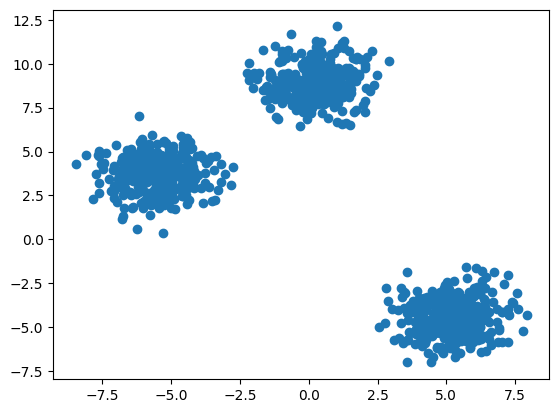

In [81]:
# plot scatteerd
plt.scatter(x[:,0],x[:,1])

# train test splot data

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)
print("shape of x_train" ,  x_train.shape)
print("shape of x_test",x_test.shape)

shape of x_train (800, 2)
shape of x_test (200, 2)


# **k_means cluster**

In [83]:
from sklearn.cluster import KMeans

In [84]:
# manually process
# plot elbow curve
wcss=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k,random_state=23,init="k-means++"   )
  Kmeans.fit(x_train)
  wcss.append(Kmeans.inertia_)

In [85]:

wcss

[41090.264957136096,
 9638.075955597622,
 1613.6445671354602,
 1452.4416880402193,
 1287.5432293205497,
 1180.8913964815597,
 988.4813802030599,
 844.2615942041598,
 799.4987874209057,
 674.2129204687949]

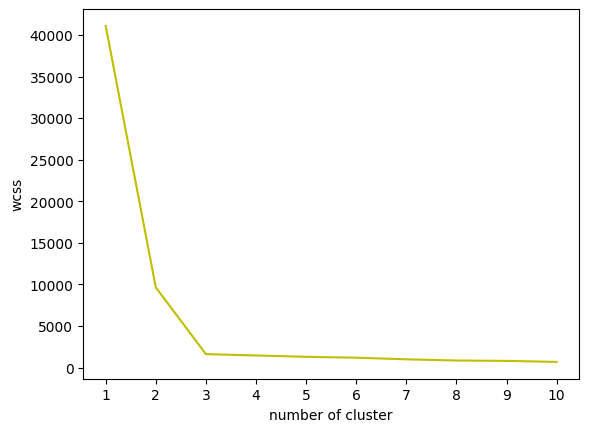

In [86]:
#plot elbow curve
plt.plot(range(1,11),wcss,c="y")
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.xticks(range(1,11))
plt.show()

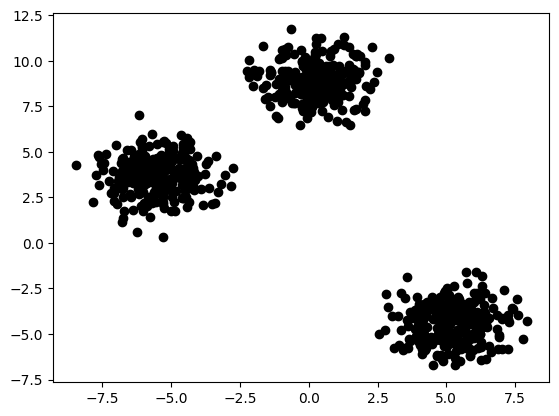

In [115]:
# check x_train daata
Kmeans=KMeans(n_clusters=3,random_state=23,init="k-means++")
Kmeans.fit_predict(x_train)
plt.scatter(x_train[:,0],x_train[:,1],c="k")

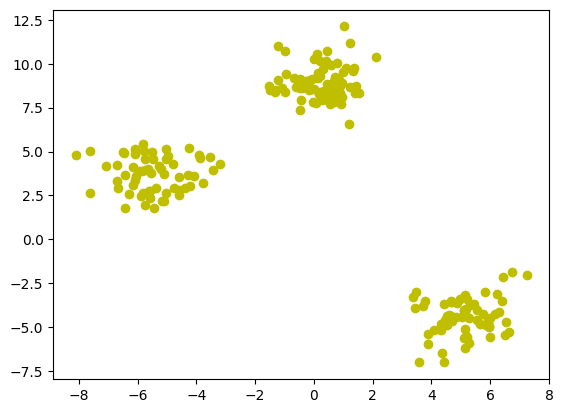

In [99]:
#  check x_test data
Kmeans.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c="y")

In [100]:
#pip install kneed
!pip install kneed

In [101]:
from kneed import KneeLocator

In [102]:
# check numer of  cluster
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [103]:
kl.elbow

3

In [104]:
# performace matrix
from sklearn.metrics import silhouette_score

In [110]:
# check score
silhoute=[]
for k in range(2,11):
  Kmeans=KMeans(n_clusters=k,random_state=23,init="k-means++"   )
  Kmeans.fit(x_train)
  score=silhouette_score(x_train,Kmeans.labels_)
  silhoute.append(score)


In [111]:
silhoute

[0.7235282106963524,
 0.8036346102542831,
 0.6403128524223266,
 0.48219404087102985,
 0.49017225717331975,
 0.3113713047939882,
 0.32487603490346545,
 0.3120592389928401,
 0.3298608983241895]

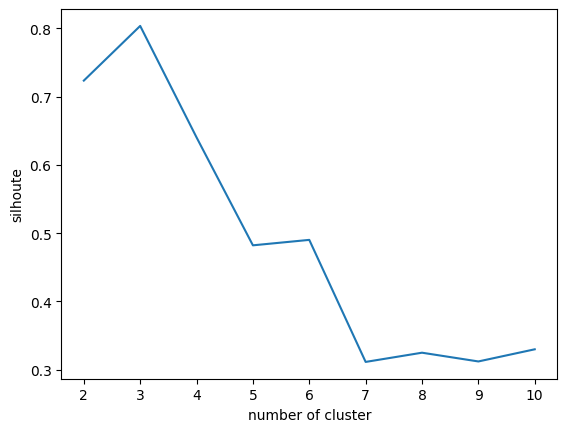

In [112]:
plt.plot(range(2,11),silhoute,)
plt.xlabel("number of cluster")
plt.ylabel("silhoute")
plt.xticks(range(2,11))
plt.show()